In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [162]:
data = pd.read_csv('testtable.csv')

In [163]:
data

,Name,%pts won-serve,%pts won-receive,%pts won-shortrally,%pts won-longrally,%pts won-FH,%pts won-BH,rank,won
0,Zhendong Fan,0.600,0.400,0.244,0.756,0.511,0.489,1,1
1,Ovtcharov Dimitrij,0.666,0.334,0.194,0.806,0.171,0.829,12,0
2,Long Ma,0.522,0.478,0.295,0.705,0.720,0.280,3,1
3,Boll Timo,0.558,0.442,0.205,0.795,0.617,0.383,10,0
4,Long Ma,0.561,0.439,0.157,0.843,0.578,0.422,3,1
...,...,...,...,...,...,...,...,...,...
353,BERTRAND IRVIN,0.552,0.448,0.421,0.579,0.702,0.298,368,0
354,KARLSSON KRISTIAN,0.555,0.445,0.361,0.639,0.638,0.362,28,0
355,IONESCU OVIDIU,0.525,0.475,0.275,0.725,0.615,0.385,55,1
356,BOLL TIMO,0.512,0.488,0.179,0.821,0.666,0.334,10,1


In [164]:
rank = list(data['rank'])
won = list(data['won'])
rankdiff=[]

for i in range(0, len(rank), 2):
    diff = rank[i]-rank[i+1]
    if rank[i] > 100 and rank[i+1] > 100:
        rankdiff.append(0)
        rankdiff.append(0)
    else:
        rankdiff.append(diff)
        rankdiff.append(diff*-1)

In [165]:
df = data.drop(columns =['rank'])

In [166]:
df['rank'] = rankdiff

In [167]:
df = df.drop(columns = ['Name'])

In [168]:
df

,%pts won-serve,%pts won-receive,%pts won-shortrally,%pts won-longrally,%pts won-FH,%pts won-BH,won,rank
0,0.600,0.400,0.244,0.756,0.511,0.489,1,-11
1,0.666,0.334,0.194,0.806,0.171,0.829,0,11
2,0.522,0.478,0.295,0.705,0.720,0.280,1,-7
3,0.558,0.442,0.205,0.795,0.617,0.383,0,7
4,0.561,0.439,0.157,0.843,0.578,0.422,1,2
...,...,...,...,...,...,...,...,...
353,0.552,0.448,0.421,0.579,0.702,0.298,0,358
354,0.555,0.445,0.361,0.639,0.638,0.362,0,-27
355,0.525,0.475,0.275,0.725,0.615,0.385,1,27
356,0.512,0.488,0.179,0.821,0.666,0.334,1,-132


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(normalized_df[['rank', '%pts won-serve','%pts won-longrally','%pts won-FH']], df.won, train_size=0.9)

In [170]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [171]:
normalized_df

,%pts won-serve,%pts won-receive,%pts won-shortrally,%pts won-longrally,%pts won-FH,%pts won-BH,won,rank
0,0.452542,0.547458,0.271044,0.728956,0.498975,0.501025,1.0,0.492120
1,0.564407,0.435593,0.186869,0.813131,0.150615,0.849385,0.0,0.507880
2,0.320339,0.679661,0.356902,0.643098,0.713115,0.286885,1.0,0.494986
3,0.381356,0.618644,0.205387,0.794613,0.607582,0.392418,0.0,0.505014
4,0.386441,0.613559,0.124579,0.875421,0.567623,0.432377,1.0,0.501433
...,...,...,...,...,...,...,...,...
353,0.371186,0.628814,0.569024,0.430976,0.694672,0.305328,0.0,0.756447
354,0.376271,0.623729,0.468013,0.531987,0.629098,0.370902,0.0,0.480659
355,0.325424,0.674576,0.323232,0.676768,0.605533,0.394467,1.0,0.519341
356,0.303390,0.696610,0.161616,0.838384,0.657787,0.342213,1.0,0.405444


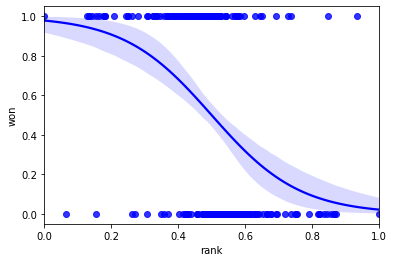

In [173]:
sns.regplot(x='rank', y='won', data=normalized_df, logistic=True, color='blue')
plt.savefig('rankdiff_win_standardised', dpi=300)

In [105]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [106]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[12,  3],
       [ 8, 13]])

In [107]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6944444444444444


In [108]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.70769231 0.67692308 0.6875     0.609375   0.71875   ]


(0.609375, 0.6800480769230769, 0.71875)

In [109]:
metrics.mean_squared_error(y_test, y_pred)

0.3055555555555556

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [111]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.66153846 0.75384615 0.640625   0.59375    0.71875   ]


(0.59375, 0.673701923076923, 0.7538461538461538)

In [112]:
metrics.mean_squared_error(y_test, y_pred)

0.3333333333333333

In [113]:
feature_names = ['rank', '%pts won-serve','%pts won-longrally','%pts won-FH']
importances = clf.feature_importances_

In [114]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

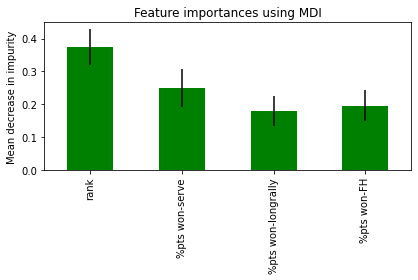

In [143]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, color='green')
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig('feature_importance', dpi=300)

In [116]:
from sklearn import svm

In [124]:
clf = svm.SVC(kernel='poly') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [125]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [126]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.67692308 0.66153846 0.703125   0.640625   0.6875    ]


(0.640625, 0.6739423076923077, 0.703125)

In [127]:
metrics.mean_squared_error(y_test, y_pred)

0.25

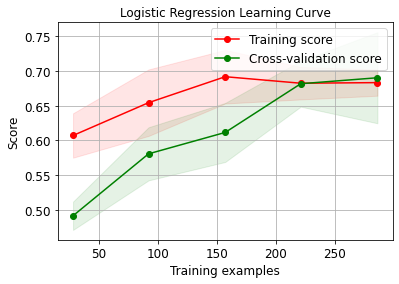

In [141]:
import scikitplot as skplt

skplt.estimators.plot_learning_curve(LogisticRegression(), normalized_df[feature_names], normalized_df.won,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Logistic Regression Learning Curve");
plt.savefig('LR_Learning_Curve', dpi=300)

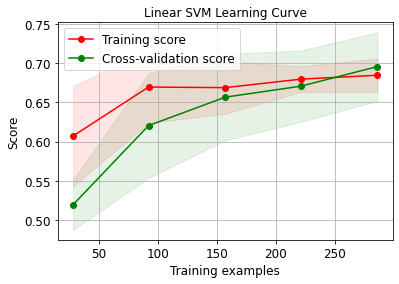

In [188]:
skplt.estimators.plot_learning_curve(svm.SVC(kernel='linear'), normalized_df[feature_names], normalized_df.won,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Linear SVM Learning Curve");
plt.savefig('SVMLinear_Learning_Curve', dpi=300)

In [185]:
lr_probas = LogisticRegression().fit(X_train, y_train).predict_proba(X_test)
rf_probas = RandomForestClassifier().fit(X_train, y_train).predict_proba(X_test)
#et_scores = svm.SVC().fit(X_train, y_train).predict_proba(X_test)

probas_list = [lr_probas, rf_probas]#, et_scores]
clf_names = ['Logistic Regression', 'Random Forest']#, 'svm']

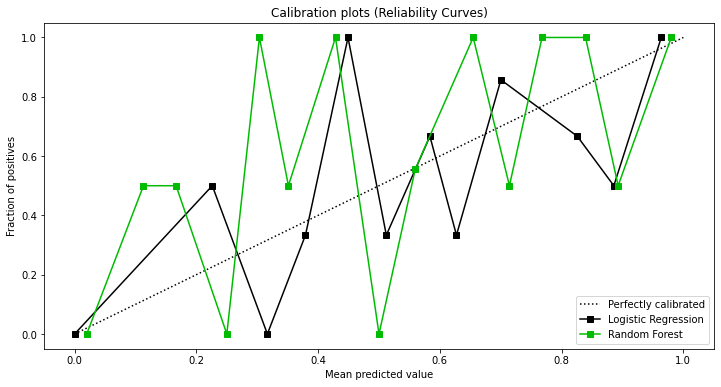

In [152]:
skplt.metrics.plot_calibration_curve(y_test,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     figsize=(12,6)
                                     );

In [174]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

In [175]:
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

In [177]:
classifier.fit(X_train, y_train)

/Users/sophiechiang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [178]:
y_pred = classifier.predict(X_test)

In [181]:
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
print("Accuracy of MLPClassifier : "'', accuracy(cm))

Accuracy of MLPClassifier :  0.7222222222222222


In [182]:
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.76923077 0.6        0.65625    0.671875   0.625     ]


(0.6, 0.6644711538461539, 0.7692307692307693)